In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
sns.set_style("whitegrid")
sns.set_palette("husl")



# Data Loading and Preparation

In [17]:
# Load data directly without custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Navigate to the correct project directory
import os
if 'brent-oil-change-point-analysis' not in os.getcwd():
    os.chdir('week-10/brent-oil-change-point-analysis')

print(f"Current working directory: {os.getcwd()}")

# Load the data directly
def parse_date(date_str):
    """Parse dates in multiple formats."""
    date_str = date_str.strip('"')
    
    # Try DD-MMM-YY format first (e.g., "20-May-87")
    try:
        return pd.to_datetime(date_str, format='%d-%b-%y')
    except ValueError:
        pass
    
    # Try MMM DD, YYYY format (e.g., "Apr 22, 2020")
    try:
        return pd.to_datetime(date_str, format='%b %d, %Y')
    except ValueError:
        pass
    
    # Try other common formats
    try:
        return pd.to_datetime(date_str)
    except ValueError:
        raise ValueError(f"Unable to parse date: {date_str}")

# Load the data
cleaned_data = pd.read_csv('data/raw/BrentOilPrices.csv', parse_dates=['Date'], date_parser=parse_date)
cleaned_data = cleaned_data.dropna().sort_values('Date').reset_index(drop=True)

print("Data loaded successfully!")
print(f"Total records: {len(cleaned_data)}")
print(f"Date range: {cleaned_data['Date'].min()} to {cleaned_data['Date'].max()}")

Current working directory: /home/dinki/Desktop/KAIMProjects/week-10/brent-oil-change-point-analysis
Data loaded successfully!
Total records: 9011
Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00


# Basic Data Exploration

In [18]:
# Basic data exploration
print("=== BASIC DATA EXPLORATION ===")
print(f"Dataset shape: {cleaned_data.shape}")
print(f"Columns: {cleaned_data.columns.tolist()}")
print(f"Data types:\n{cleaned_data.dtypes}")
print(f"Missing values:\n{cleaned_data.isnull().sum()}")

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(cleaned_data['Price'].describe())

# Check for outliers
Q1 = cleaned_data['Price'].quantile(0.25)
Q3 = cleaned_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_data[(cleaned_data['Price'] < lower_bound) | (cleaned_data['Price'] > upper_bound)]
print(f"\nOutliers (using IQR method): {len(outliers)} records")
print(f"Outlier price range: ${outliers['Price'].min():.2f} - ${outliers['Price'].max():.2f}")

=== BASIC DATA EXPLORATION ===
Dataset shape: (9011, 2)
Columns: ['Date', 'Price']
Data types:
Date     datetime64[ns]
Price           float64
dtype: object
Missing values:
Date     0
Price    0
dtype: int64

=== SUMMARY STATISTICS ===
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

Outliers (using IQR method): 0 records
Outlier price range: $nan - $nan


# Time Series Visualization

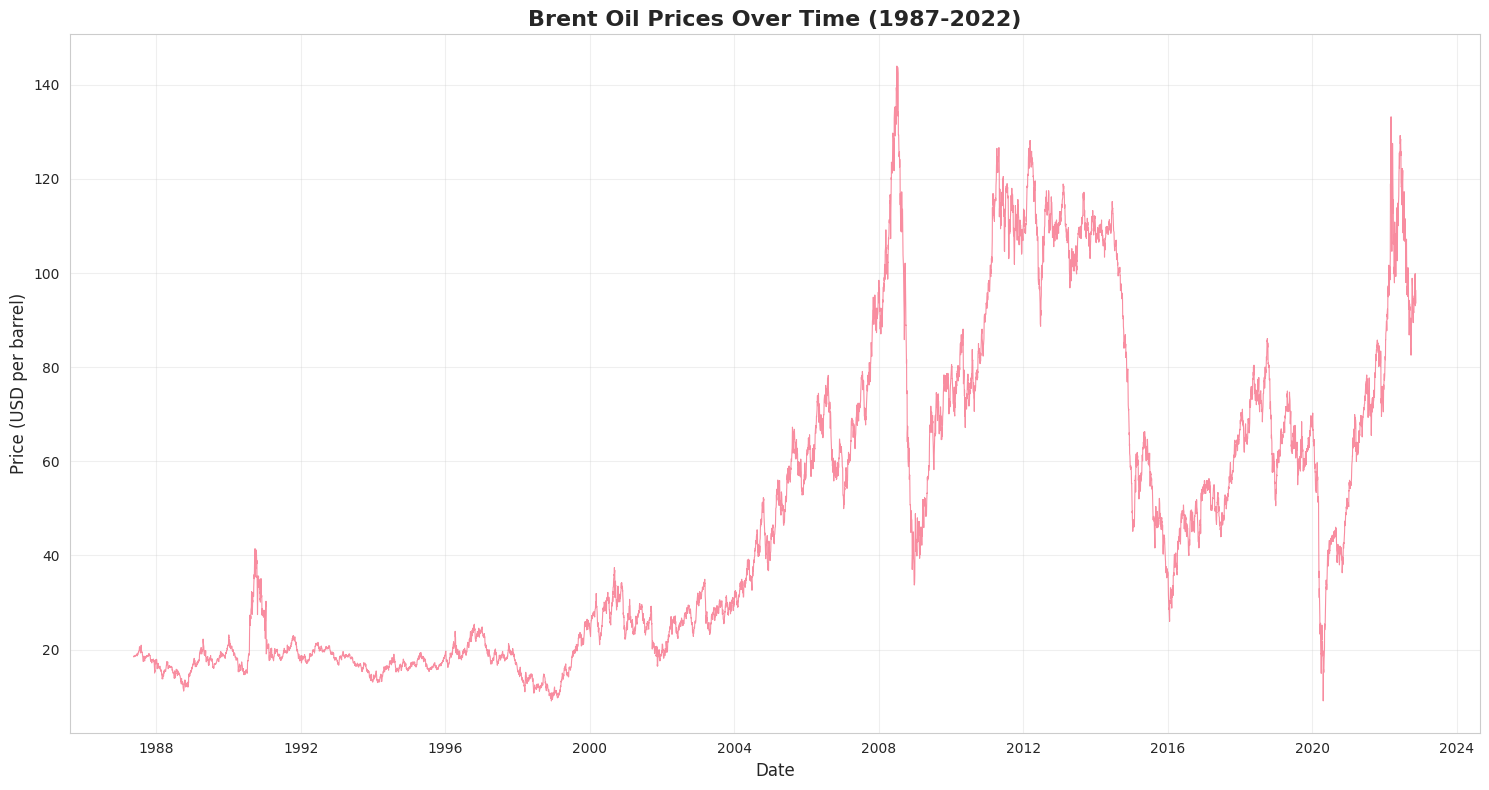

In [19]:
# Time series plot of Brent oil prices
plt.figure(figsize=(15, 8))
plt.plot(cleaned_data['Date'], cleaned_data['Price'], linewidth=0.8, alpha=0.8)
plt.title('Brent Oil Prices Over Time (1987-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interactive plotly version
fig = px.line(cleaned_data, x='Date', y='Price', 
              title='Brent Oil Prices Over Time (1987-2022)',
              labels={'Price': 'Price (USD per barrel)', 'Date': 'Date'})
fig.update_layout(width=1000, height=600)
fig.show()

# Returns Analysis and Volatility Clustering
#### Calculate log returns and analyze volatility patterns to prepare for change point detection.

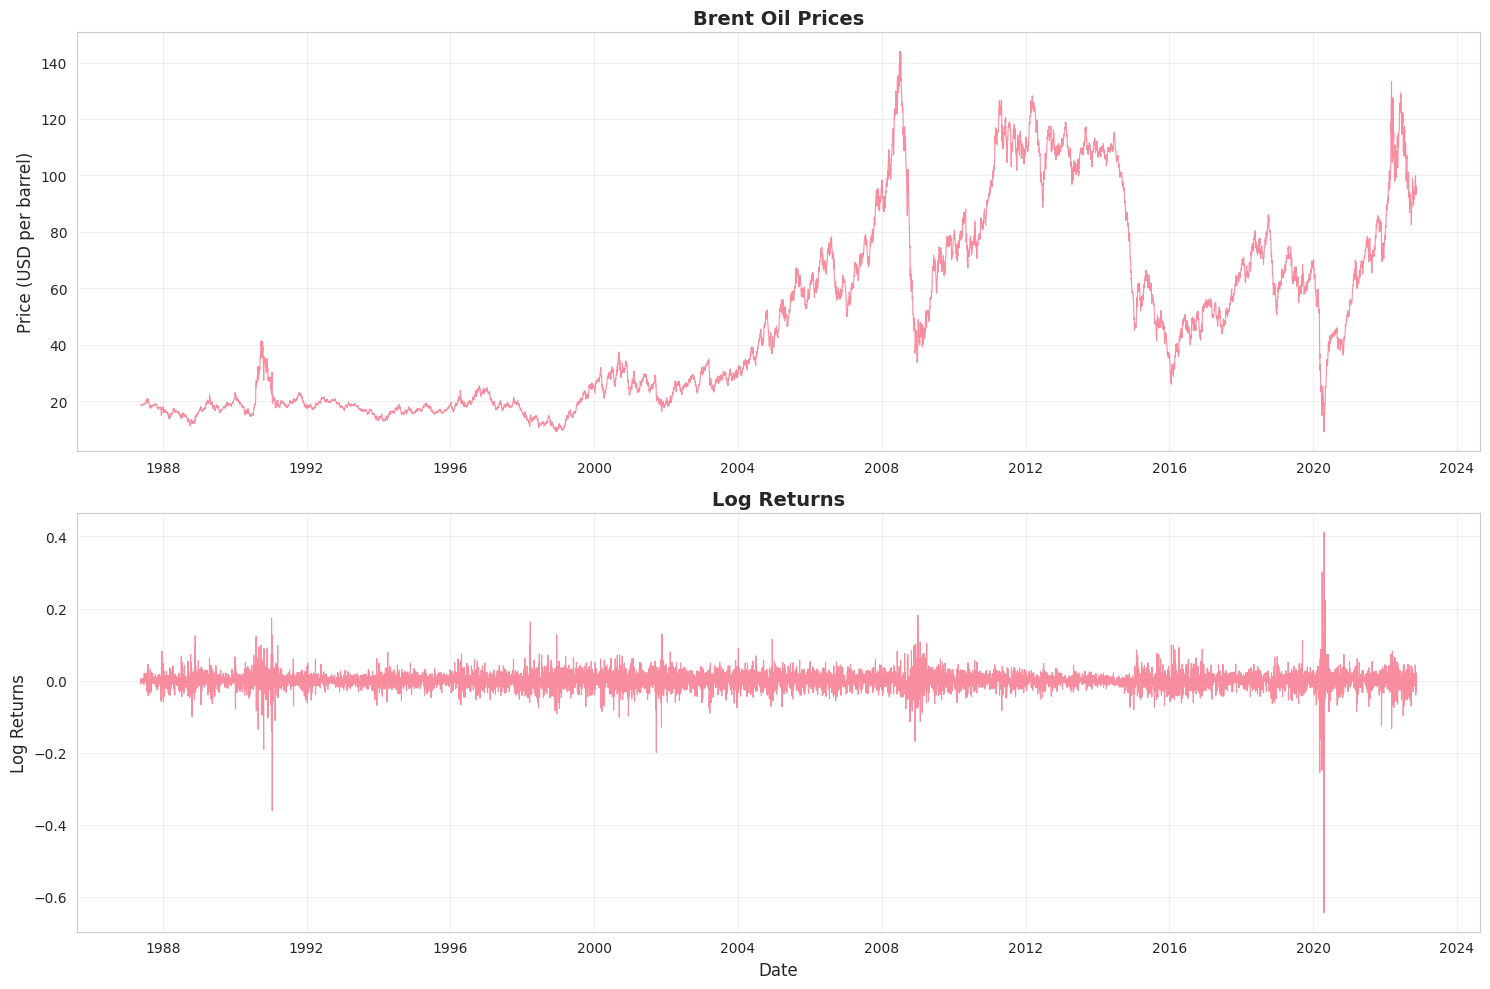

=== RETURNS ANALYSIS ===
Returns statistics:
count    9010.000000
mean        0.000179
std         0.025532
min        -0.643699
25%        -0.011154
50%         0.000402
75%         0.012127
max         0.412023
Name: Returns, dtype: float64
Returns volatility: 0.0255


In [20]:
# Calculate returns
cleaned_data['Returns'] = np.log(cleaned_data['Price'] / cleaned_data['Price'].shift(1))
data_with_returns = cleaned_data.dropna().reset_index(drop=True)

# Plot returns
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Price plot
axes[0].plot(data_with_returns['Date'], data_with_returns['Price'], linewidth=0.8, alpha=0.8)
axes[0].set_title('Brent Oil Prices', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price (USD per barrel)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Returns plot
axes[1].plot(data_with_returns['Date'], data_with_returns['Returns'], linewidth=0.8, alpha=0.8)
axes[1].set_title('Log Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Log Returns', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Returns statistics
print("=== RETURNS ANALYSIS ===")
print(f"Returns statistics:\n{data_with_returns['Returns'].describe()}")
print(f"Returns volatility: {data_with_returns['Returns'].std():.4f}")

# Time Series Properties Analysis

=== TIME SERIES PROPERTIES ANALYSIS ===
1. STATIONARITY TEST:
   ADF Test for Prices:
   - ADF Statistic: -1.9939
   - p-value: 0.2893
   - Is stationary: No

   ADF Test for Returns:
   - ADF Statistic: -16.4271
   - p-value: 0.0000
   - Is stationary: Yes

2. TREND ANALYSIS:


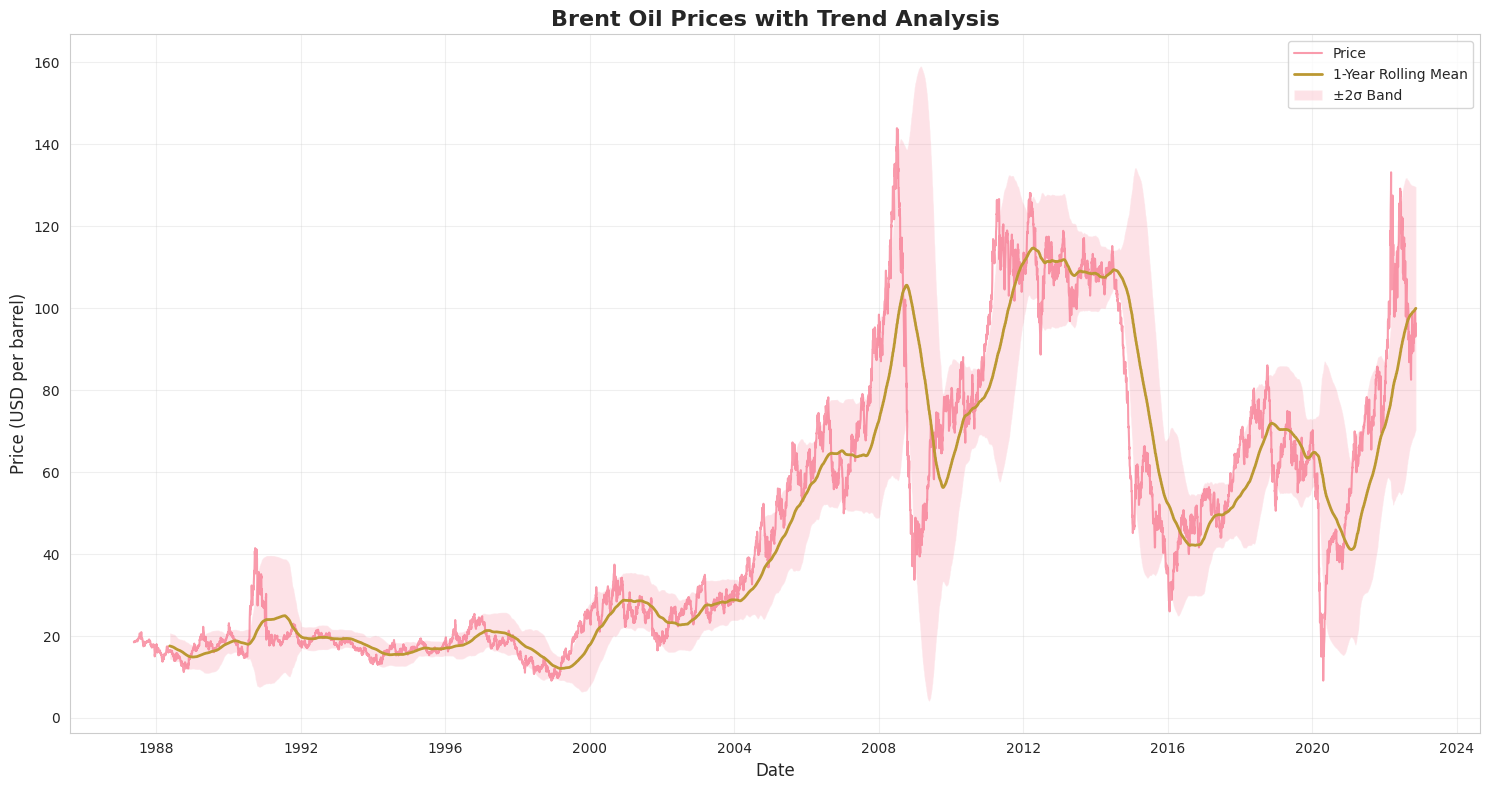


3. VOLATILITY CLUSTERING ANALYSIS:


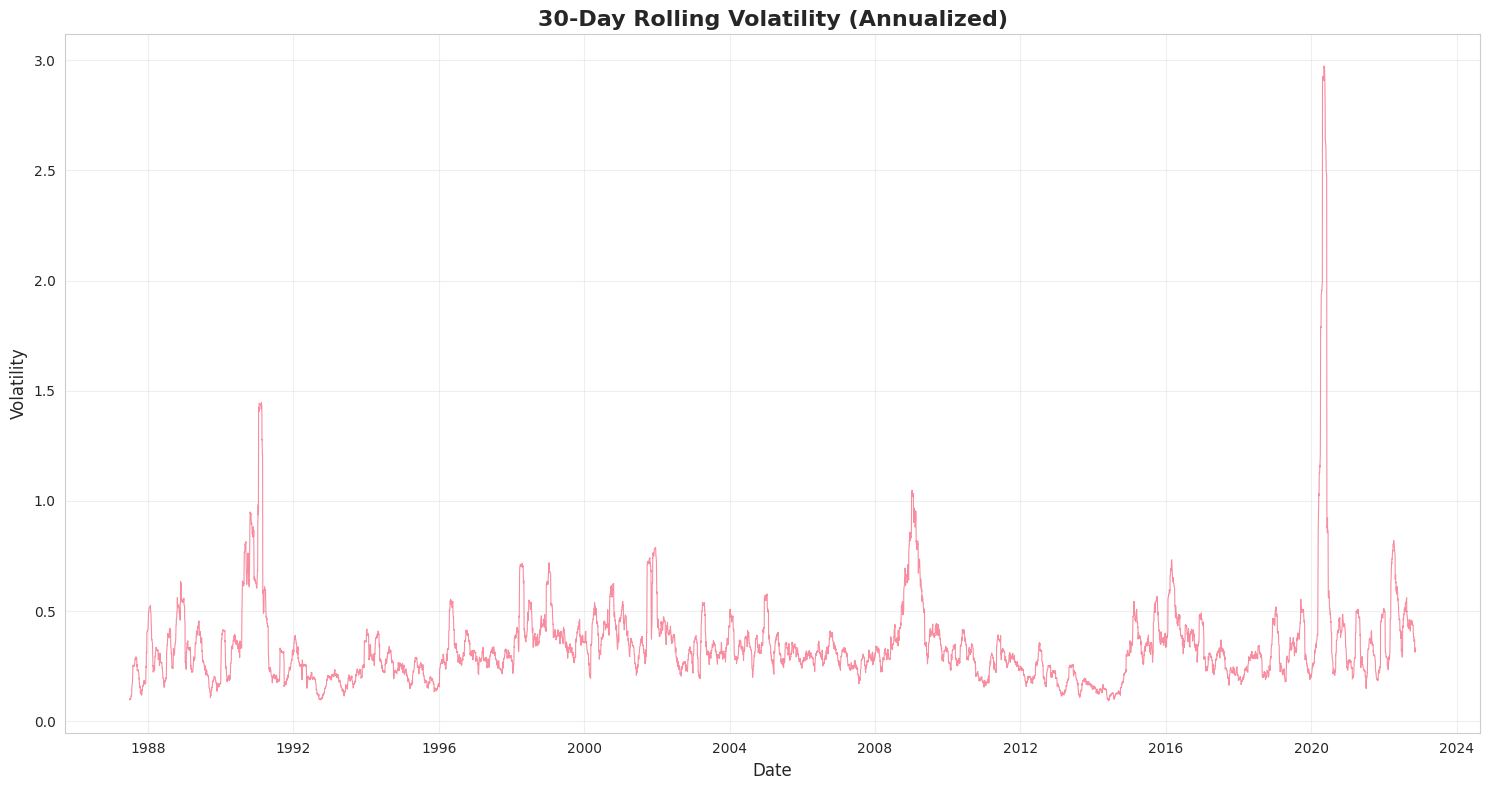

   - Volatility clustering is evident in periods of high market stress
   - Returns are more suitable for change point analysis than prices


In [21]:
# Time Series Properties Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

print("=== TIME SERIES PROPERTIES ANALYSIS ===")

# 1. Test for stationarity
print("1. STATIONARITY TEST:")
result_price = adfuller(cleaned_data['Price'])
print(f"   ADF Test for Prices:")
print(f"   - ADF Statistic: {result_price[0]:.4f}")
print(f"   - p-value: {result_price[1]:.4f}")
print(f"   - Is stationary: {'Yes' if result_price[1] < 0.05 else 'No'}")

# Test returns for stationarity
data_with_returns = cleaned_data.copy()
data_with_returns['Returns'] = np.log(data_with_returns['Price'] / data_with_returns['Price'].shift(1))
data_with_returns = data_with_returns.dropna()

result_returns = adfuller(data_with_returns['Returns'])
print(f"\n   ADF Test for Returns:")
print(f"   - ADF Statistic: {result_returns[0]:.4f}")
print(f"   - p-value: {result_returns[1]:.4f}")
print(f"   - Is stationary: {'Yes' if result_returns[1] < 0.05 else 'No'}")

# 2. Trend Analysis
print("\n2. TREND ANALYSIS:")
# Calculate rolling mean
rolling_mean = cleaned_data['Price'].rolling(window=252).mean()  # 1 year
rolling_std = cleaned_data['Price'].rolling(window=252).std()

plt.figure(figsize=(15, 8))
plt.plot(cleaned_data['Date'], cleaned_data['Price'], label='Price', alpha=0.7)
plt.plot(cleaned_data['Date'], rolling_mean, label='1-Year Rolling Mean', linewidth=2)
plt.fill_between(cleaned_data['Date'], 
                 rolling_mean - 2*rolling_std, 
                 rolling_mean + 2*rolling_std, 
                 alpha=0.2, label='±2σ Band')
plt.title('Brent Oil Prices with Trend Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Volatility Clustering
print("\n3. VOLATILITY CLUSTERING ANALYSIS:")
# Calculate rolling volatility
rolling_vol = data_with_returns['Returns'].rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(15, 8))
plt.plot(data_with_returns['Date'], rolling_vol, linewidth=0.8, alpha=0.8)
plt.title('30-Day Rolling Volatility (Annualized)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("   - Volatility clustering is evident in periods of high market stress")
print("   - Returns are more suitable for change point analysis than prices")

# Comprehensive Event Dataset

In [22]:
# Comprehensive Event Dataset
import pandas as pd

events = [
    # 1990s
    {'date': '1990-08-02', 'event': 'Iraq invades Kuwait', 'category': 'conflict', 'impact': 'high'},
    {'date': '1991-01-17', 'event': 'Gulf War begins', 'category': 'conflict', 'impact': 'high'},
    {'date': '1997-11-30', 'event': 'OPEC production cut agreement', 'category': 'policy', 'impact': 'medium'},
    
    # 2000s
    {'date': '2001-09-11', 'event': '9/11 attacks', 'category': 'terrorism', 'impact': 'high'},
    {'date': '2003-03-20', 'event': 'Iraq War begins', 'category': 'conflict', 'impact': 'high'},
    {'date': '2008-09-15', 'event': 'Lehman Brothers bankruptcy', 'category': 'financial', 'impact': 'high'},
    {'date': '2008-12-16', 'event': 'OPEC production cut (2.2M bpd)', 'category': 'policy', 'impact': 'medium'},
    
    # 2010s
    {'date': '2011-02-15', 'event': 'Libyan civil war begins', 'category': 'conflict', 'impact': 'medium'},
    {'date': '2014-06-13', 'event': 'ISIS captures Mosul', 'category': 'conflict', 'impact': 'medium'},
    {'date': '2014-11-27', 'event': 'OPEC maintains production despite price drop', 'category': 'policy', 'impact': 'high'},
    {'date': '2016-11-30', 'event': 'OPEC production cut agreement', 'category': 'policy', 'impact': 'medium'},
    {'date': '2018-06-22', 'event': 'OPEC+ production increase', 'category': 'policy', 'impact': 'medium'},
    
    # 2020s
    {'date': '2020-03-11', 'event': 'COVID-19 declared pandemic', 'category': 'health', 'impact': 'high'},
    {'date': '2020-04-20', 'event': 'WTI crude goes negative', 'category': 'financial', 'impact': 'high'},
    {'date': '2020-04-12', 'event': 'OPEC+ production cut agreement', 'category': 'policy', 'impact': 'medium'},
    {'date': '2022-02-24', 'event': 'Russia invades Ukraine', 'category': 'conflict', 'impact': 'high'},
    {'date': '2022-10-05', 'event': 'OPEC+ production cut (2M bpd)', 'category': 'policy', 'impact': 'medium'},
    {'date': '2022-12-05', 'event': 'EU oil embargo on Russia', 'category': 'policy', 'impact': 'high'}
]

event_df = pd.DataFrame(events)
event_df['date'] = pd.to_datetime(event_df['date'])
event_df = event_df.sort_values('date')

print("=== COMPREHENSIVE EVENT DATASET ===")
print(f"Total events: {len(event_df)}")
print("\nEvents by category:")
print(event_df['category'].value_counts())
print("\nEvents by impact:")
print(event_df['impact'].value_counts())

# Display events
print("\nDetailed Event List:")
for idx, row in event_df.iterrows():
    print(f"{row['date'].strftime('%Y-%m-%d')}: {row['event']} ({row['category']}, {row['impact']} impact)")

# Save to CSV
event_df.to_csv('data/events.csv', index=False)
print(f"\nEvent dataset saved to 'data/events.csv'")

=== COMPREHENSIVE EVENT DATASET ===
Total events: 18

Events by category:
policy       8
conflict     6
financial    2
terrorism    1
health       1
Name: category, dtype: int64

Events by impact:
high      10
medium     8
Name: impact, dtype: int64

Detailed Event List:
1990-08-02: Iraq invades Kuwait (conflict, high impact)
1991-01-17: Gulf War begins (conflict, high impact)
1997-11-30: OPEC production cut agreement (policy, medium impact)
2001-09-11: 9/11 attacks (terrorism, high impact)
2003-03-20: Iraq War begins (conflict, high impact)
2008-09-15: Lehman Brothers bankruptcy (financial, high impact)
2008-12-16: OPEC production cut (2.2M bpd) (policy, medium impact)
2011-02-15: Libyan civil war begins (conflict, medium impact)
2014-06-13: ISIS captures Mosul (conflict, medium impact)
2014-11-27: OPEC maintains production despite price drop (policy, high impact)
2016-11-30: OPEC production cut agreement (policy, medium impact)
2018-06-22: OPEC+ production increase (policy, medium im